In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

spy=yf.download('SPY',start="2015-01-01",end="2024-12-31")
spy.index = spy.index.date
spy = spy.reset_index().rename(columns={"index": "Date"})
spy.to_csv("../data/spy_data.csv")


[*********************100%***********************]  1 of 1 completed


In [14]:
SPY_data=pd.read_csv("../data/spy_data.csv")
SPY_data.drop(columns={'Price'},index=0,axis=0,inplace=True)
SPY_data['Date']=pd.to_datetime(SPY_data['Date'])
SPY_data['Close'] = pd.to_numeric(SPY_data['Close'], errors='coerce')
SPY_data.set_index('Date',inplace=True)
SPY_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,173.1737518310547,205.429993,206.8800048828125,204.17999267578125,206.3800048828125,121465900
2015-01-05,170.04629516601562,201.720001,204.3699951171875,201.35000610351562,204.1699981689453,169632600
2015-01-06,168.44468688964844,199.820007,202.72000122070312,198.86000061035156,202.08999633789062,209151400
2015-01-07,170.54368591308594,202.309998,202.72000122070312,200.8800048828125,201.4199981689453,125346700
2015-01-08,173.5699462890625,205.899994,206.16000366210938,203.99000549316406,204.00999450683594,147217800


In [15]:
SPY_data.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Test Statistics: 0.9132673509113326
p-Value: 0.9932610490274157
Lag used: 27
Number of observation: 27
Critical Values': {'1%': np.float64(-3.433019722288691), '5%': np.float64(-2.862719458977711), '10%': np.float64(-2.567397873407599)}
Conclusion: Non-Stationary


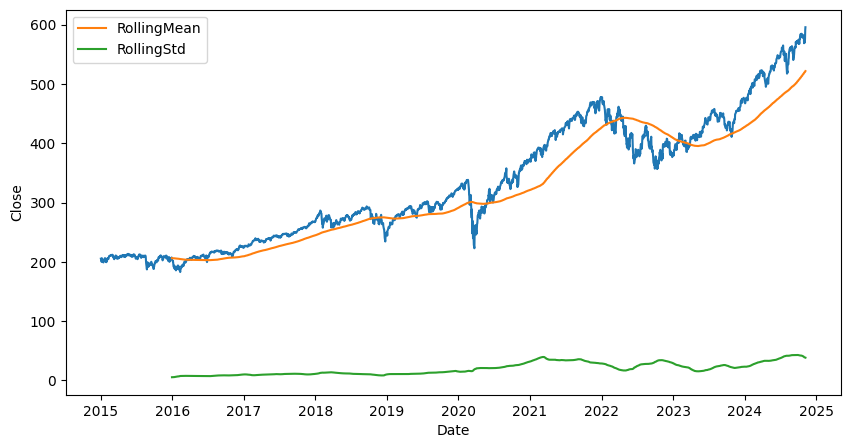

In [16]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df,col):
    df["rollingMean"]=df[col].rolling(window=252).mean()
    df["rollingStd"]=df[col].rolling(window=252).std()
    result=adfuller(df[col],autolag="AIC")
    
    print(f"Test Statistics: {result[0]}")
    print(f"p-Value: {result[1]}")
    print(f"Lag used: {result[2]}")
    print(f"Number of observation: {result[2]}")
    print(f"Critical Values': {result[4]}")
    print(f"Conclusion: {'Stationary' if result[1] < 0.05 else 'Non-Stationary'}")
    
    plt.figure(figsize=(10,5))
    sns.lineplot(df,x=df.index,y=df[col])
    sns.lineplot(df,x=df.index,y=df["rollingMean"],label="RollingMean")
    sns.lineplot(df,x=df.index,y=df["rollingStd"],label="RollingStd")
    plt.legend()
    
check_stationarity(SPY_data,'Close')

In [17]:
returns=SPY_data['Close'].pct_change()*100
returns.describe()

count    2479.000000
mean        0.049237
std         1.119097
min       -10.942374
25%        -0.380338
50%         0.058777
75%         0.593140
max         9.060326
Name: Close, dtype: float64

<Axes: xlabel='Date'>

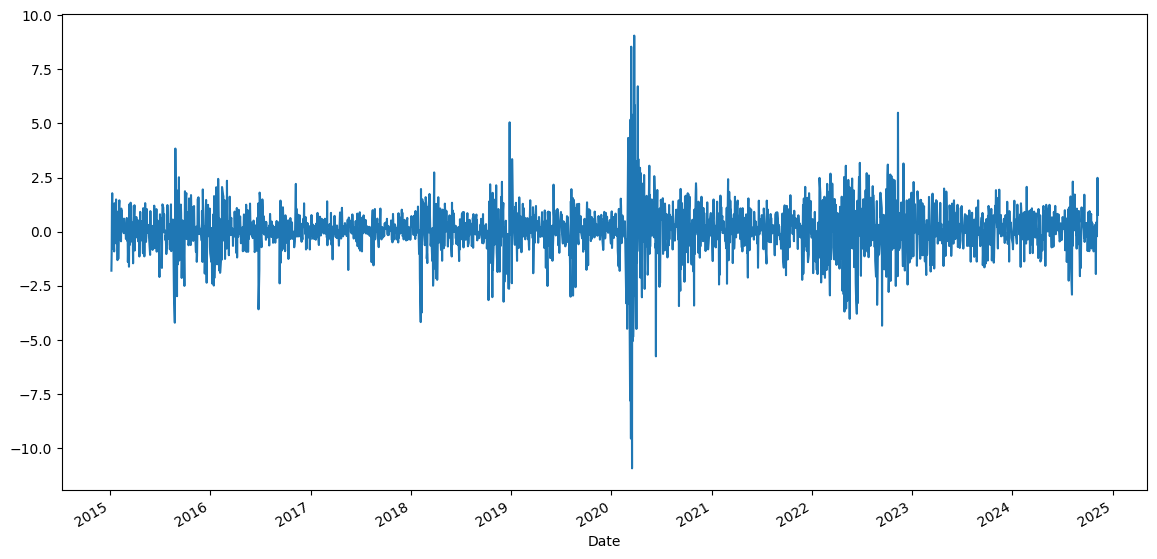

In [18]:
plt.figure(figsize=(14,7))
returns.plot()

In [19]:
returns.idxmax(),returns.idxmin()

(Timestamp('2020-03-24 00:00:00'), Timestamp('2020-03-16 00:00:00'))